In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
analysis = pd.merge(mouse_metadata, study_results, on= 'Mouse ID')

# Display a preview of the data
analysis.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = analysis.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = analysis.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = analysis.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = analysis.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = analysis.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

statistics_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


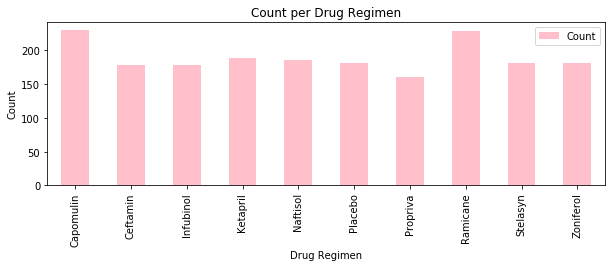

In [33]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

datapoints_df = pd.DataFrame(analysis.groupby(["Drug Regimen"]).count()).reset_index()
regimen_datapoints = datapoints_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")

regimen_datapoints.plot(kind="bar", color="pink",figsize=(10,3), align= "center")
plt.title("Count per Drug Regimen")
plt.ylabel("Count")
plt.xlabel("Drug Regimen")

plt.show()

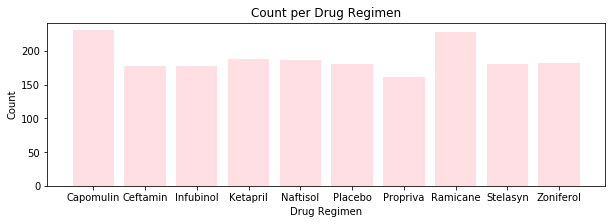

In [35]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

drug_regimens = statistics_df.index.tolist()
drug_regimens

regimen_count = (analysis.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_count

x_axis = drug_regimens

plt.figure(figsize=(10,3))
plt.bar(x_axis, regimen_count, color="pink", alpha=0.5)
plt.title("Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen